### Michelle Leeuw 

I had fun recreating one of the hands-on lab sessions of IBM:MLO120EN DEEP LEARNING WITH TENSORFLOW Course. Can be accessed through Cognitive Class.

### Understanding and coding with Python 

###### Covolution: 1D operation with Python (Numpy\Scipy)

<h4>Mathematical notation</h4>
In this first example, we will use the pure mathematical notation. Here we have a one dimensional convolution operation. Lets say h is our image and x is our kernel: 

x\[i] = { 3, 4, 5 }\
h\[i] = { 2, 1, 0 }

where i = index

To use the convolution operation between the two arrays try the code below to see how easy it is to do in Python.

In [1]:
import numpy as np 

h = [2, 1, 0]
x = [3, 4, 5]

y = np.convolve(x,h)


array([ 6, 11, 14,  5,  0])

sliding x window over h:

<ul>
    <li>6  = 2 * 3 :            
        $
        \begin{bmatrix}
             3 & 4 & 5 \\\\
        \end{bmatrix}
        \\\\ 
        \begin{bmatrix}
             2 & 0 & 0 \\\\
        \end{bmatrix}
        $ 
    </li>
    <li>11 = 1 * 3 + 2 * 4 :
        $
        \begin{bmatrix}
             3 & 4 & 5 \\\\
        \end{bmatrix}
        \\\\
        \begin{bmatrix}
             1 & 2 & 0 \\\\
        \end{bmatrix}
        $ 
    </li>  
    <li>14 = 0 * 3 + 1 * 4 + 2 * 5 :
        $
        \begin{bmatrix}
             3 & 4 & 5 \\\\
        \end{bmatrix}
        \\\\
        \begin{bmatrix}
             0 & 1 & 2 \\\\
        \end{bmatrix}
        $ 
    </li>  
    <li>5  = 0 * 4 + 1 * 5 :
        $
        \begin{bmatrix}
             3 & 4 & 5 \\\\
        \end{bmatrix}
        \\\\
        \begin{bmatrix}
             0 & 0 & 1 \\\\
        \end{bmatrix}
        $ 
    </li>
    <li>0  = 0 * 5 :
        $
        \begin{bmatrix}
             3 & 4 & 5 \\\\
        \end{bmatrix}
        \\\\
        \begin{bmatrix}
             0 & 0 & 0 \\\\
        \end{bmatrix}
        $ 
    </li>
</ul>


In [3]:
print("Compare with the following values from Python: y[0] = {0} ; y[1] = {1}; y[2] = {2}; y[3] = {3}; y[4] = {4}".format(y[0], y[1], y[2], y[3], y[4])) 

Compare with the following values from Python: y[0] = 6 ; y[1] = 11; y[2] = 14; y[3] = 5; y[4] = 0


There are three methods to apply kernel on the matrix, <b>with padding (full)</b>, <b>with padding(same)</b> and <b>without padding(valid)</b>:

</h3>1) Visually understanding the operation with padding (full)</h3>

Lets think of the kernel as a sliding window. We have to come with the solution of padding zeros on the input array. This is a very famous implementation and will be easier to show how it works with a simple example, consider this case:

x\[i] = \[6,2]\
h\[i] = \[1,2,5,4]


Using the zero padding, we can calculate the convolution.

You have to invert the filter x, otherwise the operation would be cross-correlation.
First step, (now with zero padding):

In [8]:
x =[6, 2]
h = [1, 2, 5, 4]

y = np.convolve(x, h, "full") #
y

array([ 6, 14, 34, 34,  8])

In [9]:
x = [6, 2]
h = [1, 2, 5, 4]

y = np.convolve(x, h, "same")  # it is same as zero padding, but with returns an ouput with the same length as max of x or h
y  

array([ 6, 14, 34, 34])

In [10]:
import numpy as np

x = [6, 2]
h = [1, 2, 5, 4]

y = np.convolve(x, h, "valid")   # valid returns output of length max(x, h) - min(x, h) + 1, this is to ensure that values outside of the boundary of 
                                # h will not be used in the calculation of the convolution
                                # in the next example we will understand why we used the argument valid
y  


array([14, 34, 34])


 Original type: <PIL.Image.Image image mode=L size=750x933 at 0x1964FA5ED60> 


After converion to numerical representation: 

 array([[254, 254, 254, ..., 254, 254, 254],
       [218, 218, 218, ..., 218, 218, 218],
       [243, 243, 243, ..., 243, 243, 243],
       ...,
       [ 46,  43,  41, ..., 236, 254, 221],
       [ 45,  42,  41, ..., 138, 253, 245],
       [ 42,  40,  40, ...,  56, 148, 250]], dtype=uint8)

 Input image coverted to grey scale: 



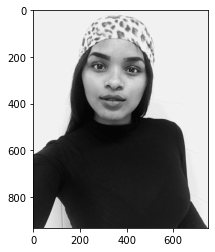

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import signal 
from scipy import misc
from PIL import Image

im = Image.open("leeuw.jpg")  #used my own image 

image_gr = im.convert('L')    # convert("L") translate color images into black and white
                              # uses the ITU-R 601-2 Luma transform (there are several 
                              # ways to convert an image to grey scale)

print('\n Original type: %r \n\n' % image_gr)

#convert image to a matrix with values from o to 255 (unit8)
arr = np.asarray(image_gr)
print("After converion to numerical representation: \n\n %r" % arr)
####Activationg matplotlib for Ipython 
%matplotlib inline 

### Plot image 

imgplot = plt.imshow(arr)
imgplot.set_cmap("gray")  # you can experiment different colormaps(grey, winter, autumn)
print("\n Input image coverted to grey scale: \n")
plt.show(imgplot)

In [19]:
kernel = np.array([[ 0, 1, 0],
                   [ 1,-4, 1],
                   [ 0, 1, 0],]) 

grad = signal.convolve2d(arr, kernel, mode='same', boundary='symm')

GRADIENT MAGNITUDE - Feature map


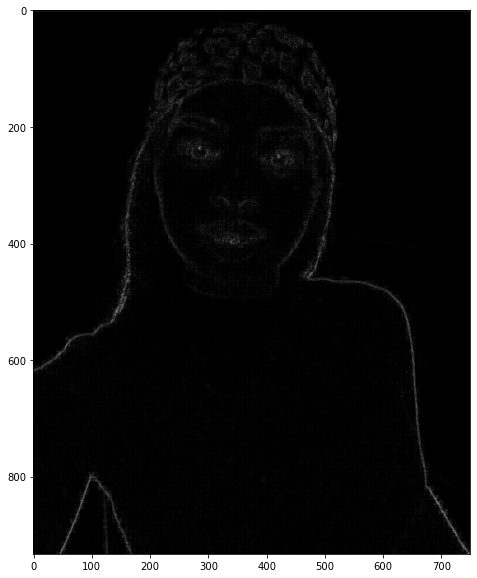

In [20]:
print('GRADIENT MAGNITUDE - Feature map')

fig, aux = plt.subplots(figsize=(10,10))
aux.imshow(np.absolute(grad), cmap = 'gray')

In [21]:
type(grad)

grad_biases = np.absolute(grad) + 100

grad_biases[grad_biases > 255] = 255

GRADIENT MAGNITUDE - Feature map


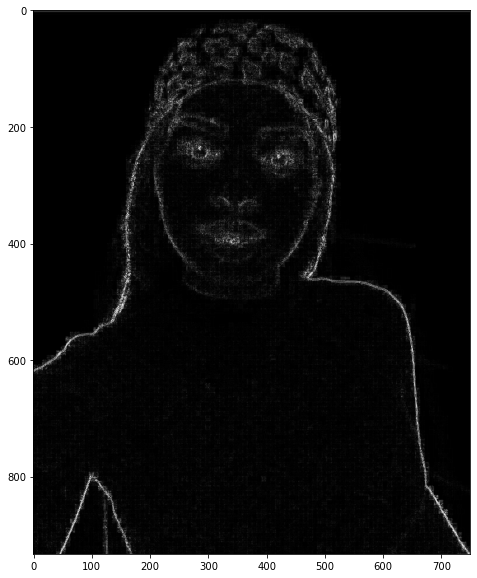

In [22]:
print('GRADIENT MAGNITUDE - Feature map')

fig, aux = plt.subplots(figsize=(10,10))
aux.imshow(np.absolute(grad_biases), cmap='gray')

###### Conclusion

This understanding of how convolutions work are the foundation of how Convolutional Neural Networks work. After this tutorial you are supposed to understand the underlying mathematical concepts and how to apply them using| Python (Numpy) and TensorFlow. The next step is to extrapolate this knowledge to Machine Learning applications

Credit to the following Authors 

<a href="https://www.linkedin.com/in/saeedaghabozorgi?lipi=urn%3Ali%3Apage%3Ad_flagship3_profile_view_base_contact_details%3Bnymx3ia1QWOz75jIC8IGRw%3D%3D "> Saeed Aghabozorgi</a>, <a href="https://ca.linkedin.com/in/rafaelblsilva?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0120ENSkillsNetwork20629446-2022-01-01"> Rafael Belo Da Silva</a><br />

This tutorial was inspired by the documentation of TensorFlow: [https://www.tensorflow.org/versions/r0.9/get_started/index.html](https://www.tensorflow.org/versions/r0.9/get_started/index.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0120ENSkillsNetwork20629446-2022-01-01) <br>

### References 

Just for personal gain:

<https://github.com/joanbruna/stat212b/blob/master/lec1.pdf>\
[http://deeplearning.stanford.edu/wiki/index.php/Feature_extraction_using_convolution](http://deeplearning.stanford.edu/wiki/index.php/Feature_extraction_using_convolution?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0120ENSkillsNetwork20629446-2022-01-01)\
[http://homepages.inf.ed.ac.uk/rbf/HIPR2/fourier.htm](http://homepages.inf.ed.ac.uk/rbf/HIPR2/fourier.htm?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0120ENSkillsNetwork20629446-2022-01-01)